In [34]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import preprocessing

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

from keras.layers.advanced_activations import LeakyReLU

data = pd.read_csv  (r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\pahowdy_cfb_wr_training.csv')
rookie_data = pd.read_csv (r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\pahowdy_cfb_wr_rookies.csv', encoding='latin-1')

print(np.shape(data))

(976, 84)


In [24]:
npData = data.to_numpy()

#print(npData)

y = data.iloc[:, 83].to_numpy()

# print(len(y))
# print(len(npData))

for i in range(len(y)):
    if y[i] > 20:
        for x in range(5):
            data = data.append(data.iloc[i])
            #npData = np.vstack([npData, npData[i]])
            y = np.append(y, y[i])

# print(len(y))
#print(len(npData))
print(len(data))
# print(npData)
# print(y)

1481


(array([199., 524., 107., 171., 192., 156.,  54.,  30.,  36.,  12.]),
 array([ 0.   ,  5.434, 10.868, 16.302, 21.736, 27.17 , 32.604, 38.038,
        43.472, 48.906, 54.34 ]),
 <BarContainer object of 10 artists>)

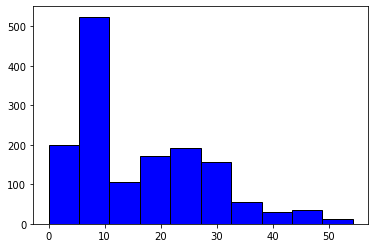

In [25]:
#plt.bar([x for x in range(len(y))], y)

plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = 10)

In [26]:
cols = list(data.columns)
cols_rookie = list(rookie_data.columns)

names1 = list(rookie_data.iloc[:, 0])


remove = list()
# remove.append(cols[30])
# remove.append(cols[32])
# remove.append(cols[34])
# remove.append(cols[57])
# remove.append(cols[58])
remove_rookie = list()
# remove_rookie.append(cols[30])
# remove_rookie.append(cols[32])
# remove_rookie.append(cols[34])
# remove_rookie.append(cols[57])
# remove_rookie.append(cols[58])


for i in range(len(cols)):
    if (i > 77 or i<5):
        remove.append(cols[i])
    
for i in range(len(cols_rookie)):
    if (i<5):
        remove_rookie.append(cols_rookie[i])

# print(remove)
# print(remove_rookie)
    
X = data.drop(columns=remove)

x_rookie = rookie_data.drop(columns=remove_rookie)

labels = list(X.columns)

labels_rookie = list(x_rookie.columns)

print(np.shape(X))

# print(labels)
# print(labels_rookie)

(1481, 73)


In [27]:
names = ["linReg", "ridgeReg", "lassoReg", "dtReg", "rfReg", "svrReg", "ensembleReg"]

reg1 = LinearRegression()
reg2 = Ridge()
reg3 = Lasso()
reg4 = DecisionTreeRegressor()
reg5 = RandomForestRegressor()
reg6 = SVR()

ensemble = VotingRegressor(estimators=[('lin', reg1), ('ridge', reg2), ('lasso', reg3), 
                                       ('dt', reg4), ('rf', reg5), ('svr', reg6)])

namesDict = dict()

for i in names:
    namesDict[i] = 0
    
#print(namesDict)

for i in range(100):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    linReg = LinearRegression().fit(X_train, y_train)
    namesDict["linReg"] = namesDict["linReg"] + linReg.score(X_test, y_test)

    ridgeReg = Ridge().fit(X_train, y_train)
    namesDict["ridgeReg"] = namesDict["ridgeReg"] + ridgeReg.score(X_test, y_test)

    lassoReg = Lasso().fit(X_train, y_train)
    namesDict["lassoReg"] = namesDict["lassoReg"] + lassoReg.score(X_test, y_test)

    dtReg = DecisionTreeRegressor().fit(X_train, y_train)
    namesDict["dtReg"] = namesDict["dtReg"] + dtReg.score(X_test, y_test)

    rfReg = RandomForestRegressor().fit(X_train, y_train)
    namesDict["rfReg"] = namesDict["rfReg"] + rfReg.score(X_test, y_test)

    svrReg = SVR().fit(X_train, y_train)
    namesDict["svrReg"] = namesDict["svrReg"] + svrReg.score(X_test, y_test)
    
    ensembleReg = ensemble.fit(X_train, y_train)
    namesDict["ensembleReg"] = namesDict["ensembleReg"] + ensembleReg.score(X_test, y_test)
    

for i in namesDict:
    print(i + ": " + str(namesDict[i]/100))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
linReg: 0.5033880731708874
ridgeReg: 0.5087837111186337
lassoReg: 0.4627122977910209
dtReg: 0.6854292292358305
rfReg: 0.8316016154573032
svrReg: 0.17934677883155423
ensembleReg: 0.6802038574681478


DR
Feature: 0, Score: 2.21665
DP
Feature: 1, Score: -0.08127
Draft Year
Feature: 2, Score: -0.03571
Designation in last Year
Feature: 3, Score: -1.77218
Age IN DRAFT YEAR (9/1/dy)
Feature: 4, Score: 0.71875
Conference Drafted Rate
Feature: 5, Score: 2.40236
Conference Hit Rate
Feature: 6, Score: 8.22687
Age Adjusted Hit Rate AVG
Feature: 7, Score: 15.98857
Pre-Draft
Feature: 8, Score: -2.47696
Pre-Draft Percentile
Feature: 9, Score: 9.41009
Post-Draft
Feature: 10, Score: 2.23997
Post-Draft Percentile
Feature: 11, Score: -11.91905
DADA
Feature: 12, Score: -0.66611
Cr.Year BO
Feature: 13, Score: 0.06767
Decimal BOA (30%)
Feature: 14, Score: 0.93216
Cr.Year BO.1
Feature: 15, Score: -0.69949
Years Played
Feature: 16, Score: -2.58809
G
Feature: 17, Score: 0.11106
AVG PPG
Feature: 18, Score: 0.14928
rec
Feature: 19, Score: 0.09915
YARDS
Feature: 20, Score: -0.00594
YPR
Feature: 21, Score: 0.66278
REC/g
Feature: 22, Score: -0.66952
FINAL MS YARDS RK
Feature: 23, Score: 0.29369
College Dominat

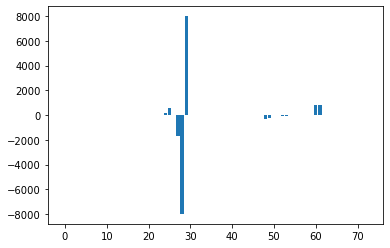

In [28]:
reg = LinearRegression()
reg.fit(X, y)

importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print(labels[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [29]:
# print(np.shape(x))
# print(np.shape(x_rookie))

realReg = RandomForestRegressor()
realReg.fit(X, y)

predictions = list(realReg.predict(x_rookie))

tempDict = dict()

for i in range(len(predictions)):
     tempDict[names1[i]] = predictions[i]   
        
new = sorted(tempDict.items(), key=lambda x: x[1], reverse=True)

for i in new:
    print(i)

# for i in x_rookie:
#     print(x_rookie[i])

("Ja'Marr Chase", 30.278100000000013)
('Jaylen Waddle', 25.4271)
('Rashod Bateman', 24.752799999999997)
('Rondale Moore', 23.336599999999997)
('Devonta Smith', 21.9427)
('Elijah Moore', 21.516299999999998)
('Chatarius Atwell', 20.7023)
('Terrace Marshall Jr.', 18.020899999999997)
('Kadarius Toney', 17.494400000000006)
("D'Wayne Eskridge", 17.419199999999993)
('Amon-Ra St. Brown', 15.729099999999994)
('Jaelon Darden', 14.298099999999998)
('Dyami Brown', 14.140699999999997)
('Tylan Wallace', 13.1143)
('Anthony Schwartz', 13.008700000000001)
('Nico Collins', 12.7512)
('Isaiah McKoy', 11.913000000000004)
('Kekoa Crawford', 11.173600000000008)
('Josh Palmer', 10.894199999999998)
('Dax Milne', 10.863300000000004)
('Warren Jackson', 10.811900000000001)
('Amari Rodgers', 10.797)
('Whop Philyor', 10.414600000000009)
('Jacob Harris', 10.042700000000004)
('Ronnie Bell', 10.042300000000008)
('Seth Williams', 9.911400000000006)
('Jhamon Ausbon', 9.833300000000005)
('Trevon Grimes', 9.76490000000001

In [39]:
tempDict = dict()

for i in names1:
    tempDict[i] = 0


for i in range(1):
    rfReg = RandomForestRegressor().fit(X, y)

    predictions = list(rfReg.predict(x_rookie))

    for i in range(len(predictions)):
         tempDict[names1[i]] = tempDict[names1[i]] + predictions[i]   
            
norm = preprocessing.normalize([list(tempDict.items())])
print(norm)

new = sorted(tempDict.items(), key=lambda x: x[1], reverse=True)

print(type(new))

for i in new:
    print(i)


ValueError: could not convert string to float: 'Elijah Moore'

In [37]:
normalized_arr = preprocessing.normalize([new])

print(normalized_arr)

ValueError: could not convert string to float: "Ja'Marr Chase"

In [ ]:
# Oversampled 976 --> 4004 Results
# ('Rondale Moore', 3561.4873000000034)
# ("Ja'Marr Chase", 3081.1657000000014)
# ('Rashod Bateman', 2638.0142999999994)
# ('Jaylen Waddle', 2241.2254999999996)
# ('Chatarius Atwell', 2150.1086000000005)
# ('Elijah Moore', 2093.3333)
# ('Devonta Smith', 1897.9726999999987)
# ('Terrace Marshall Jr.', 1892.7095999999985)
# ('Jaelon Darden', 1853.723)
# ('Dyami Brown', 1737.077199999999)
# ("D'Wayne Eskridge", 1657.7739000000001)
# ('Anthony Schwartz', 1537.5537999999997)
# ('Tylan Wallace', 1535.804)
# ('Kadarius Toney', 1525.7971000000002)
# ('Amon-Ra St. Brown', 1467.9059000000007)
# ('Nico Collins', 1378.5035999999996)
# ('Warren Jackson', 1262.8369000000002)
# ('Josh Palmer', 1252.1196000000002)
# ('Amari Rodgers', 1182.2010000000002)
# ('Whop Philyor', 1069.0514000000005)
# ('Isaiah McKoy', 1067.4528)
# ('Ronnie Bell', 1064.6812000000004)
# ('Tamorrion Terry', 1058.7027)
# ('Dax Milne', 1013.6370000000004)
# ('Landen Akers', 1012.8826000000006)
# ('Keylon Stokes', 1009.1203000000008)
# ('Jahan Dotson', 984.8040000000008)
# ('Sage Surratt', 970.9573000000006)
# ('Trevon Grimes', 965.3614000000009)
# ('Jeremiah Holloman', 949.0499000000011)
# ('Seth Williams', 940.8259000000003)
# ('Jhamon Ausbon', 936.0921000000008)
# ('T.J. Vasher', 922.8112000000013)
# ('Demetris Robertson', 896.6225000000004)
# ('Blake Proehl', 894.7767000000008)
# ('Damon Hazelton Jr', 894.6549000000009)
# ('Kekoa Crawford', 890.6097000000007)
# ('Jeremiah Haydel', 884.7980000000008)
# ('Tarik Black', 878.2405000000005)
# ('Tyler Vaughns', 861.4297000000006)
# ('Dazz Newsome', 852.5296000000005)
# ('JD Spielman', 851.6494000000007)
# ('Ihmir Smith-Marsette', 833.3519000000006)
# ('Theo Howard', 827.691000000001)
# ('Dez Fitzpatrick', 826.9463000000004)
# ('DeVontres Dukes', 822.9771000000009)
# ('Jonathan Adams Jr.', 800.9342000000008)
# ('Simi Fehoko', 784.6941000000005)
# ('Jalen Camp', 784.6726)
# ('Justin Shorter', 774.9439000000004)
# ('Shi Smith', 763.3267000000005)
# ('Marquez Stevenson', 749.8758)
# ('Jacob Harris', 729.2777000000002)
# ('McLane Mannix', 718.2268000000008)
# ('Nikko Remigio', 669.8209000000004)

In [ ]:
# Oversampled --> 2491 Results
# ("Ja'Marr Chase", 3025.7382000000007)
# ('Jaylen Waddle', 2661.6145000000015)
# ('Rondale Moore', 2560.4506)
# ('Rashod Bateman', 2557.6081999999988)
# ('Jaelon Darden', 2349.4025000000006)
# ('Chatarius Atwell', 2143.957)
# ('Elijah Moore', 2092.5290999999993)
# ('Devonta Smith', 1954.1797999999992)
# ('Terrace Marshall Jr.', 1832.2586999999987)
# ('Kadarius Toney', 1630.8087999999998)
# ('Dyami Brown', 1620.2604999999996)
# ('Amon-Ra St. Brown', 1614.718)
# ("D'Wayne Eskridge", 1594.270900000001)
# ('Tylan Wallace', 1474.3299)
# ('Nico Collins', 1344.4017000000003)
# ('Anthony Schwartz', 1297.6012000000007)
# ('Josh Palmer', 1147.2413)
# ('Amari Rodgers', 1144.8981999999996)
# ('Kekoa Crawford', 1135.6250000000007)
# ('Isaiah McKoy', 1095.9900000000002)
# ('Dax Milne', 1070.3294000000005)
# ('Warren Jackson', 1065.2093000000004)
# ('Whop Philyor', 1034.8750000000007)
# ('Sage Surratt', 1034.773700000001)
# ('Ronnie Bell', 1000.1703000000009)
# ('Tamorrion Terry', 996.8578000000006)
# ('Jahan Dotson', 964.1142000000009)
# ('Keylon Stokes', 963.6320000000009)
# ('Trevon Grimes', 952.0750000000014)
# ('T.J. Vasher', 951.8551000000011)
# ('Jeremiah Holloman', 950.1059000000009)
# ('Seth Williams', 947.5854000000006)
# ('Jhamon Ausbon', 945.5752000000007)
# ('Blake Proehl', 927.821800000001)
# ('Landen Akers', 916.7052000000003)
# ('Jeremiah Haydel', 901.8375000000013)
# ('Tarik Black', 897.2132000000005)
# ('Damon Hazelton Jr', 891.0249000000008)
# ('Demetris Robertson', 886.157800000001)
# ('Dazz Newsome', 876.4831)
# ('JD Spielman', 871.7678000000009)
# ('Tyler Vaughns', 868.2418000000006)
# ('Justin Shorter', 861.6689000000002)
# ('Jonathan Adams Jr.', 860.165200000001)
# ('Simi Fehoko', 859.3438000000007)
# ('Theo Howard', 851.3211000000008)
# ('DeVontres Dukes', 826.6775000000007)
# ('Shi Smith', 816.7325000000009)
# ('McLane Mannix', 807.9661000000008)
# ('Dez Fitzpatrick', 804.3884000000004)
# ('Marquez Stevenson', 780.4084)
# ('Jalen Camp', 779.0518000000002)
# ('Ihmir Smith-Marsette', 766.1182000000006)
# ('Jacob Harris', 752.6133000000001)
# ('Nikko Remigio', 734.4757000000009)

In [ ]:
# Oversampled --> 1481
# ("Ja'Marr Chase", 3075.5472000000004)
# ('Jaylen Waddle', 2628.1696)
# ('Rashod Bateman', 2526.326900000001)
# ('Elijah Moore', 2252.2444)
# ('Chatarius Atwell', 2199.0982)
# ('Rondale Moore', 2100.1973999999996)
# ('Devonta Smith', 2096.5921)
# ('Terrace Marshall Jr.', 1866.1932)
# ("D'Wayne Eskridge", 1746.278599999999)
# ('Kadarius Toney', 1687.0640999999994)
# ('Jaelon Darden', 1520.9977000000001)
# ('Dyami Brown', 1492.6814999999995)
# ('Amon-Ra St. Brown', 1460.9999999999995)
# ('Anthony Schwartz', 1408.1386999999995)
# ('Tylan Wallace', 1375.2273999999998)
# ('Nico Collins', 1368.0958000000005)
# ('Isaiah McKoy', 1224.3901000000005)
# ('Josh Palmer', 1121.1786)
# ('Amari Rodgers', 1112.8951)
# ('Warren Jackson', 1088.3446000000008)
# ('Kekoa Crawford', 1080.9204000000009)
# ('Dax Milne', 1073.5094000000008)
# ('Seth Williams', 1034.9978000000008)
# ('Whop Philyor', 1020.1447000000007)
# ('Justin Shorter', 1004.7242000000007)
# ('Blake Proehl', 971.4997000000013)
# ('Ronnie Bell', 966.0639000000012)
# ('Tamorrion Terry', 962.8238000000002)
# ('Sage Surratt', 961.2819000000003)
# ('Jeremiah Holloman', 953.4420000000008)
# ('T.J. Vasher', 951.8254000000011)
# ('Jhamon Ausbon', 950.7489000000006)
# ('Keylon Stokes', 940.7122000000006)
# ('Tarik Black', 936.8512000000001)
# ('Jahan Dotson', 924.2680000000009)
# ('Trevon Grimes', 921.3273000000012)
# ('Jeremiah Haydel', 899.9830000000009)
# ('Demetris Robertson', 897.4184000000012)
# ('Jonathan Adams Jr.', 896.276300000001)
# ('Landen Akers', 895.2418000000004)
# ('Tyler Vaughns', 891.9566000000003)
# ('JD Spielman', 885.0805000000006)
# ('Damon Hazelton Jr', 875.1959000000008)
# ('Jacob Harris', 870.5141000000003)
# ('Dazz Newsome', 866.1557000000001)
# ('Simi Fehoko', 862.9850000000006)
# ('Shi Smith', 857.1405000000001)
# ('Theo Howard', 849.2943000000008)
# ('Dez Fitzpatrick', 848.6404000000007)
# ('McLane Mannix', 836.5819000000012)
# ('DeVontres Dukes', 829.7050000000006)
# ('Nikko Remigio', 820.1658000000009)
# ('Marquez Stevenson', 777.7760000000002)
# ('Jalen Camp', 758.8695000000005)
# ('Ihmir Smith-Marsette', 756.6663000000003)